In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from windrose import WindroseAxes


In [7]:
benin_df = pd.read_csv("../data/benin_clean.csv")
sierraleone_df = pd.read_csv("../data/sierraleone_clean.csv")
togo_df = pd.read_csv("../data/togo_clean.csv")

/tmp/ipykernel_55209/1870031404.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="country", y=metric, palette="Set2")
/tmp/ipykernel_55209/1870031404.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="country", y=metric, palette="Set2")
/tmp/ipykernel_55209/1870031404.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="country", y=metric, palette="Set2")


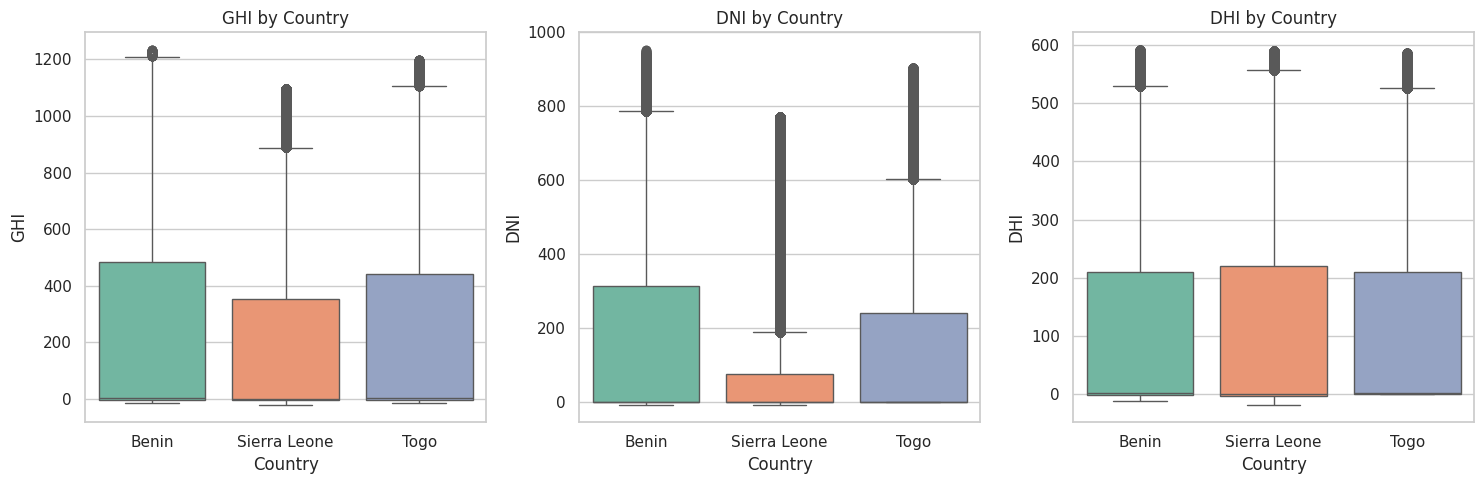

In [9]:
benin_df["country"] = "Benin"
sierraleone_df["country"] = "Sierra Leone"
togo_df["country"] = "Togo"

# Combine all into one DataFrame
df_all = pd.concat([benin_df, sierraleone_df, togo_df], ignore_index=True)

# Metrics to plot
metrics = ["GHI", "DNI", "DHI"]

# Plotting boxplots side-by-side
plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df_all, x="country", y=metric, palette="Set2")
    plt.title(f"{metric} by Country")
    plt.xlabel("Country")
    plt.ylabel(metric)

plt.tight_layout()
plt.show()


In [12]:
summary = df_all.groupby("country")[metrics].agg(['mean', 'median', 'std'])

# Flatten the column MultiIndex
summary.columns = ['_'.join(col) for col in summary.columns]
summary = summary.reset_index()

print(summary)


        country    GHI_mean  GHI_median     GHI_std    DNI_mean  DNI_median  \
0         Benin  240.342811         1.8  330.868308  167.187516        -0.1   
1  Sierra Leone  196.441990         0.3  291.235290  104.527217        -0.1   
2          Togo  229.831936         2.1  321.643747  149.368966         0.0   

      DNI_std    DHI_mean  DHI_median     DHI_std  
0  261.710501  110.906983         1.6  152.916844  
1  201.696328  110.109541        -0.1  154.170508  
2  248.554496  112.408673         2.5  151.292938  


In [ ]:
benin_ghi = benin_df['GHI'].dropna()
sierraleone_ghi = sierraleone_df['GHI'].dropna()
togo_ghi = togo_df['GHI'].dropna()

stat, p = stats.kruskal(benin_ghi, sierraleone_ghi, togo_ghi)

print(f"Kruskal–Wallis H-statistic: {stat:.3f}")
print(f"p-value: {p:.5f}")

# Interpretation
if p < 0.05:
    print("✅ The difference in GHI values across countries is statistically significant.")
else:
    print("⚠️ No statistically significant difference in GHI values across countries.")



Kruskal–Wallis H-statistic: 5142.448
p-value: 0.00000
✅ The difference in GHI values across countries is statistically significant.


- Benin shows the highest mean GHI.
- Togo has the highest median GHI and relatively high variability, suggesting that typical GHI values are higher but with some spread.
- Sierra Leone has the lowest mean and median GHI and the smallest variability, reflecting consistently lower GHI values across samples.

/tmp/ipykernel_55209/848729411.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ghi_means.values, y=ghi_means.index, palette="Set2")


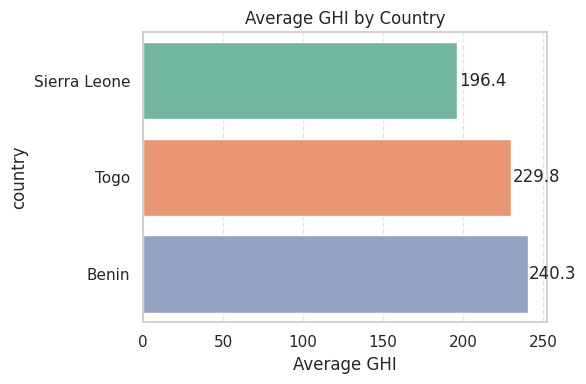

In [17]:
ghi_means = df_all.groupby("country")["GHI"].mean().sort_values()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=ghi_means.values, y=ghi_means.index, palette="Set2")

# Annotate bars with values
for i, value in enumerate(ghi_means.values):
    plt.text(value + 1, i, f"{value:.1f}", va="center")

plt.xlabel("Average GHI")
plt.title("Average GHI by Country")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
